In [1]:
import pandas as pd
import numpy as np
import os
from os.path import splitext, basename
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reads in the compiled dataset
dfm=pd.read_excel('MeltInclusionCompilation_Sept22.xlsx')

In [3]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


In [8]:
Bacon=dfm.loc[dfm['reference']=="Bacon_1992"]
Bacon['Sat_P_Pref']=Bacon['satp_meash2omeasco2']/1000
Bacon['Study']="Bacon"
Bacon['Comp']="Rhyodacite"

Mandeville=dfm.loc[dfm['reference']=="Mandeville et al. 2010"]
Mandeville['Sat_P_Pref']=Mandeville['satp_meash2omeasco2']/1000
Mandeville['Study']="Mandeville"
Mandeville['Comp']="Rhyodacite"

W2012=dfm.loc[dfm['reference']=="Wright et al. 2012"]
W2012['Sat_P_Pref']=W2012['satp_meash2omeasco2']/1000
W2012['Study']="W12"
W2012['Comp']="Rhyodacite"



MI_Combo_allH2O=pd.concat([Bacon, W2012, Mandeville], axis=0)
MI_Combo=MI_Combo_allH2O.loc[MI_Combo_allH2O['h2o_raw_wt']>3]

In [9]:
len(MI_Combo)

144

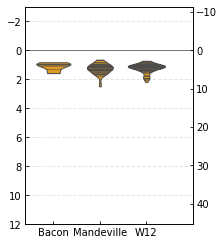

In [10]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(3,4), sharey=True)
ax2 = ax1.twinx()

volc_order=["Bacon",  "Mandeville", "W12"]
violin_parts=sns.violinplot(x="Study", y="Sat_P_Pref",  cut=0, inner="stick", linewidth=1,
              palette=['orange'],
            data=MI_Combo,  ax=ax1,  order=volc_order, stick=True)
##

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([-0.6, 2.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([ 0, 1, 2, 3])
#ax1.set_xticklabels(['Bacon', 'W2016', 'W2019', ''], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
#ax1.get_legend().remove()   
#ax2.set_yticks([])
fig.savefig('Crater_MIs.png', dpi=200, bbox_inches="tight")